In [2]:
import nltk;
from nltk.corpus import gutenberg
import re
from nltk.corpus import stopwords
import pandas as pd
import statistics 
import math
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import metrics
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
files_en = gutenberg.fileids()      # Get file ids
doc_en1 = gutenberg.open('edgeworth-parents.txt').read()
doc_en2 = gutenberg.open('milton-paradise.txt').read()
doc_en3 = gutenberg.open('whitman-leaves.txt').read()
tokens_en1 = re.sub('[^A-Za-z]', ' ', doc_en1)
tokens_en2 = re.sub('[^A-Za-z]', ' ', doc_en2)
tokens_en3 = re.sub('[^A-Za-z]', ' ', doc_en3)
#nltk.download('gutenberg')
tokens_en_lower1 = tokens_en1.lower()
tokens_en_lower2 = tokens_en2.lower()
tokens_en_lower3 = tokens_en3.lower()
from nltk.tokenize import word_tokenize
tokens_en_lower1 = word_tokenize(tokens_en_lower1)
tokens_en_lower2 = word_tokenize(tokens_en_lower2)
tokens_en_lower3 = word_tokenize(tokens_en_lower3)

filtered_words1 = [word for word in tokens_en_lower1 if word not in stopwords.words('english')]
filtered_words2 = [word for word in tokens_en_lower2 if word not in stopwords.words('english')]
filtered_words3 = [word for word in tokens_en_lower3 if word not in stopwords.words('english')]
en1 = nltk.Text(filtered_words1)
en2 = nltk.Text(filtered_words2)
en3 = nltk.Text(filtered_words3)

#print(len(en1.tokens))       # returns number of tokens (document length)
#print(len(set(en1.tokens)))  # returns number of unique tokens
#print(len(en2.tokens)) 
len(filtered_words1)
len(filtered_words2)
len(filtered_words3)

65029

In [4]:
#Segmentation
sampledData1=[]
sampledData2=[]
sampledData3=[]
sampledDataTest =[]
X1 = []
for i in range(0, 200*150,150):
    sampledData1.append(filtered_words1[i:i+150])
for j in range(0, 200*150,150):
    sampledData2.append(filtered_words2[j:j+150])
for k in range(0, 200*150,150):
    sampledData3.append(filtered_words3[k:k+150])
    
sampledData =sampledData1 + sampledData2 + sampledData3
dataframe = pd.DataFrame(sampledData)
dataframe= dataframe.apply(" ".join, axis=1)
dataframe = pd.DataFrame(dataframe)
dataframe.columns = ['Sample']
c = pd.DataFrame({'author':[],'Genre':[]})
frames =[dataframe,c]
MergedFrame = pd.concat(frames)
MergedFrame = MergedFrame[['Sample','author','Genre']]

C:\Users\Ruthvik\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [5]:
dataframe

,Sample
0,parent assistant maria edgeworth orphans near ...
1,good children finished eating suppers came rou...
2,resolved exert utmost first care pay debts mot...
3,charity sake neighbours poor enough bethought ...
4,debt schoolmistress would receive goat said co...
5,round side church saw mary kneeling beside gra...
6,could teach knit supply flax isabella sent nex...
7,largest longest best decayed labourers women c...
8,could made always believed said answer bid wai...
9,wear shoes stockings hurt feet besides waited ...


In [6]:
# Appending label on segments
for i in range(200):
    MergedFrame['Genre'][i] ="Fiction"
    MergedFrame['author'][i] =0
for i in range(200,400):
    MergedFrame['Genre'][i] ="Poetry"
    MergedFrame['author'][i] =1
for i in range(400,600):
    MergedFrame['Genre'][i] ="Tragedy"
    MergedFrame['author'][i] =2
    
#Shuffle

C:\Users\Ruthvik\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Ruthvik\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ruthvik\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing 

In [11]:
MergedFrame['Sample'][6]

'could teach knit supply flax isabella sent next day great service mary kept employment month sold yarn spun money enough buy warm flannel winter wear besides spinning well learned school plain work tolerably neatly isabella caroline employed work earned great deal could spinning leisure hours taught sisters read write edmund part money earned work doors paid schoolmaster teaching little arithmetic winter nights came used light rush candles mary work gathered stripped good provision rushes month august neighbour gave grease dip one evening lighted candles footman came sent isabella plain work mary servant englishman newly come ireland rush candles caught attention never seen came part england used edmund ready oblige proud candles noticed showed englishman made gave bundle rushes proper species rush says white natural history selborne seems juncus effusus common soft rush found moist pastures sides streams hedges rushes best condition height summer may gathered serve purpose well quite

In [25]:
#Transformation of TFiDF
from sklearn.feature_extraction.text import TfidfVectorizer
matrixTfidf = TfidfVectorizer(max_df=0.8, max_features=200000,stop_words='english',
                                 min_df=0.2,
                                 use_idf=True, ngram_range=(1,3))
XTfidf = matrixTfidf.fit_transform(MergedFrame['Sample']).todense()
XTfidf= pd.DataFrame(XTfidf, columns= matrixTfidf.get_feature_names())

In [26]:
XTfidf

,came,come,day,earth,far,good,great,hand,heaven,high,...,long,love,man,night,old,said,saw,shall,till,time
0,0.000000,0.184923,0.000000,0.000000,0.000000,0.167214,0.000000,0.000000,0.000000,0.000000,...,0.187441,0.000000,0.000000,0.000000,0.190571,0.828208,0.000000,0.000000,0.000000,0.185420
1,0.169324,0.000000,0.000000,0.000000,0.000000,0.717796,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.168339,0.000000,0.160052,0.163612,0.284418,0.177768,0.000000,0.000000,0.000000
2,0.348710,0.326959,0.288797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.602758,0.000000,0.000000,0.292868,0.000000,0.000000,0.000000,0.327838
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.637622,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.292495,0.254233,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.866640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.219714,0.000000,0.000000,0.275523,0.245949
5,0.000000,0.000000,0.213654,0.000000,0.255732,0.218722,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.249273,0.433330,0.541682,0.000000,0.000000,0.000000
6,0.768848,0.240297,0.212250,0.000000,0.000000,0.217285,0.444072,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.371115,0.000000,0.444205,0.379919,0.388225,0.000000,0.000000,0.000000,...,0.425875,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.515785,0.000000,0.000000,0.528020,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.300887,0.523055,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000


In [27]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(XTfidf)

In [15]:
len(dist)

600

In [16]:
dist

array([[-2.22044605e-16,  4.88988428e-01,  6.00914840e-01, ...,
         9.64269733e-01,  7.75233462e-01,  8.29851092e-01],
       [ 4.88988428e-01,  1.11022302e-16,  8.87163191e-01, ...,
         9.43818430e-01,  8.41683166e-01,  8.91634927e-01],
       [ 6.00914840e-01,  8.87163191e-01,  0.00000000e+00, ...,
         9.72566233e-01,  6.49550889e-01,  1.00000000e+00],
       ...,
       [ 9.64269733e-01,  9.43818430e-01,  9.72566233e-01, ...,
        -2.22044605e-16,  8.07244851e-01,  1.00000000e+00],
       [ 7.75233462e-01,  8.41683166e-01,  6.49550889e-01, ...,
         8.07244851e-01,  0.00000000e+00,  8.73204141e-01],
       [ 8.29851092e-01,  8.91634927e-01,  1.00000000e+00, ...,
         1.00000000e+00,  8.73204141e-01, -2.22044605e-16]])

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
model = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=1)
model.fit(XTfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [29]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = matrixTfidf.get_feature_names()
for i in range(3):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :100]:
        print(' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 heaven
 high
 earth
 far
 great
 like
 till
 shall
 night
 know
 hand
 came
 long
 day
 let
 man
 good
 love
 saw
 time
 said
 come
 old
 little
Cluster 1:
 said
 little
 good
 know
 came
 saw
 come
 time
 let
 shall
 day
 great
 like
 man
 hand
 old
 till
 night
 long
 love
 high
 far
 earth
 heaven
Cluster 2:
 man
 day
 love
 old
 earth
 long
 night
 shall
 great
 time
 come
 far
 good
 like
 know
 hand
 high
 till
 let
 saw
 little
 came
 heaven
 said


In [30]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [32]:
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

In [33]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#1b9e77', 2: '#1b9e77'}

#set up cluster names using a dict
cluster_names = {0: 'Edgeworth', 
                 1: 'Shakespear', 
                 2: 'Whitman', 
                 }

In [34]:
%matplotlib inline

In [35]:
from sklearn.cluster import KMeans

num_clusters = 3

km = KMeans(n_clusters=num_clusters)

%time km.fit(XTfidf)

clusters = km.labels_.tolist()

CPU times: user 133 ms, sys: 3.98 ms, total: 137 ms
Wall time: 71.1 ms


/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


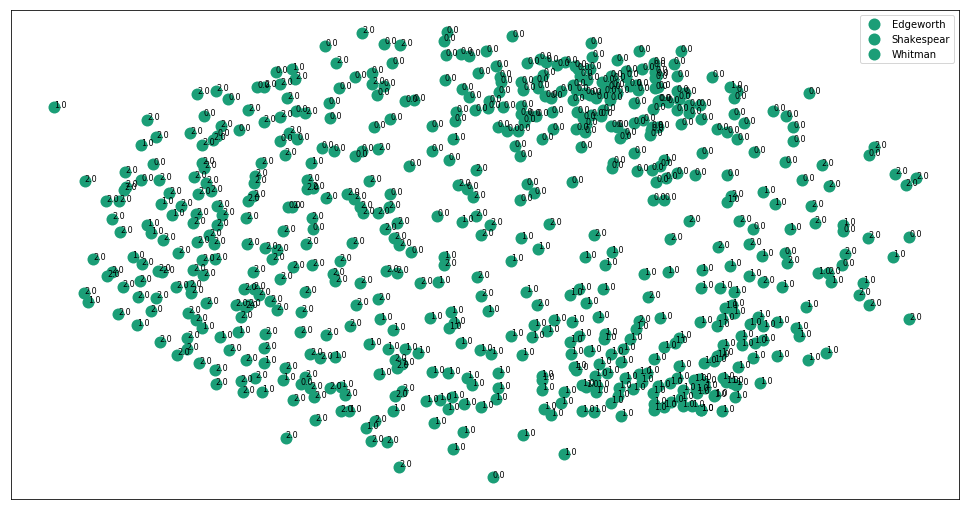

In [36]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=MergedFrame['author'])) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

In [37]:
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3'}

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


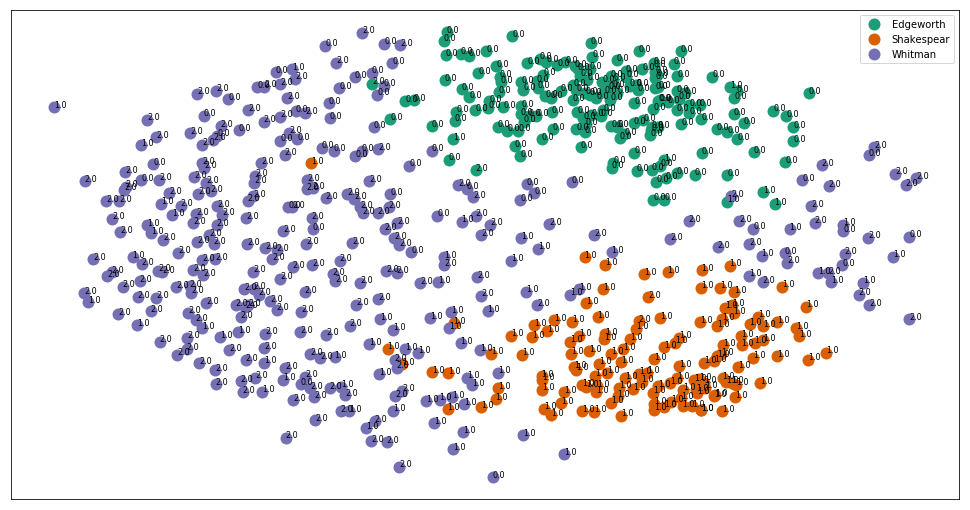

In [39]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=MergedFrame['author'])) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot


In [ ]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(600,600)) # set size


In [66]:
from sklearn.metrics import silhouette_samples, silhouette_score
 
sil_avg = silhouette_score(XTfidf, clusters)
print('For number of clusters:', + num_clusters, 'average sil score:', sil_avg)
    # Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(XTfidf, clusters)

For number of clusters: 3 average sil score: 0.11712729561105988
